<a href="https://colab.research.google.com/github/kris11na/Kristina/blob/master/Diplom_Balina_kendal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
data_raw_germ_DAX = pd.read_html('https://en.wikipedia.org/wiki/DAX', match='Ticker')


In [ ]:
data_raw_germ_DAX = data_raw_germ_DAX[0]
data_raw_germ_DAX.head()

,Logo,Company,Prime Standard Sector,Ticker,Index weighting (%)1,Employees,Founded
0,NaN,Adidas,Apparel,ADS.DE,2.0,"061,401 (2021)",1924
1,NaN,Airbus,Aerospace & Defence,AIR.DE,6.0,126.495 (2021),1970
2,NaN,Allianz,Financial Services,ALV.DE,7.1,"155,411 (2021)",1890
3,NaN,BASF,Chemicals,BAS.DE,3.5,"111,047 (2021)",1865
4,NaN,Bayer,Pharmaceuticals,BAYN.DE,4.8,"099,637 (2021)",1863


In [ ]:
data_raw_germ_DAX = data_raw_germ_DAX.sort_values('Index weighting (%)1', ascending=False).iloc[:30]

In [ ]:
stocks_DAX = {}
for index, row in data_raw_germ_DAX.iterrows():
    ticker = str(row['Ticker'])
    ticker_dax_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_dax_data.shape[0] != 0:
        stocks_DAX[ticker] = ticker_dax_data

In [ ]:
data_raw_GB_FTSE100 = pd.read_html('https://en.wikipedia.org/wiki/FTSE_100_Index', match='Ticker')

In [ ]:
data_raw_GB_FTSE100 = data_raw_GB_FTSE100[0]
data_raw_GB_FTSE100['Ticker'] = data_raw_GB_FTSE100['Ticker'] + '.L'
data_raw_GB_FTSE100.head()

,Company,Ticker,FTSE industry classification benchmark sector[18]
0,3i,III.L,Financial services
1,Admiral Group,ADM.L,Insurance
2,Airtel Africa,AAF.L,Telecommunications services
3,Anglo American plc,AAL.L,Mining
4,Antofagasta plc,ANTO.L,Mining


In [ ]:
stocks_FTSE100 = {}
for index, row in data_raw_GB_FTSE100.iterrows():
    ticker = str(row['Ticker'])
    ticker_ftse_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_ftse_data.shape[0] != 0:
        stocks_FTSE100[ticker] = ticker_ftse_data


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AV..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BA..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BP..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BT.A.L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JD..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NG..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RR..L']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SN..L']: Exception('%ticker%: No timezone found, symbol may be de

In [ ]:
data_raw_Fr_CAC40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40', match='Ticker' )

In [ ]:
data_raw_Fr_CAC40 = data_raw_Fr_CAC40[0]
data_raw_Fr_CAC40.head()

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA


In [ ]:
stocks_CAC40 = {}
for index, row in data_raw_Fr_CAC40.iterrows():
    ticker = str(row['Ticker'])
    ticker_cac_data = yf.download(ticker, start="2023-01-01", end="2023-12-31", progress=False)
    if ticker_cac_data.shape[0] != 0:
        stocks_CAC40[ticker] = ticker_cac_data

Скачали данные об акциях из индексов за 2023 год

In [ ]:
#Германия

In [ ]:
DAX_returns_dict=dict()

for ticker in stocks_DAX.keys():
    DAX_returns_dict[ticker] = np.log(stocks_DAX[ticker]['Close'] / stocks_DAX[ticker]['Close'].shift(1))
dax_DF_returns = pd.DataFrame(DAX_returns_dict).dropna()

In [ ]:
#Франция

In [ ]:
CAC_returns_dict=dict()

for ticker in stocks_CAC40.keys():
    CAC_returns_dict[ticker] = np.log(stocks_CAC40[ticker]['Close'] / stocks_CAC40[ticker]['Close'].shift(1))
CAC_DF_returns = pd.DataFrame(CAC_returns_dict).dropna()

In [ ]:
#Англия

In [ ]:
FTSE_returns_dict=dict()

for ticker in stocks_FTSE100.keys():
    FTSE_returns_dict[ticker] = np.log(stocks_FTSE100[ticker]['Close'] / stocks_FTSE100[ticker]['Close'].shift(1))
FTSE_DF_returns = pd.DataFrame(FTSE_returns_dict).dropna()

In [ ]:
dax_DF = dax_DF_returns.corr(method='kendall')

In [ ]:
dax_DF

,SAP.DE,SIE.DE,ALV.DE,DTE.DE,AIR.DE,BAYN.DE,MBG.DE,IFX.DE,MUV2.DE,BAS.DE,...,DTG.DE,VNA.DE,P911.DE,SY1.DE,MTX.DE,HEN3.DE,BNR.DE,BEI.DE,HNR1.DE,FRE.DE
SAP.DE,1.000000,0.343519,0.260425,0.182633,0.308221,0.200807,0.241058,0.330008,0.143055,0.211172,...,0.180903,0.214127,0.202900,0.249205,0.234808,0.185368,0.245706,0.170695,0.115309,0.150125
SIE.DE,0.343519,1.000000,0.343087,0.179017,0.305171,0.252784,0.386150,0.406124,0.177684,0.357018,...,0.325054,0.183387,0.246343,0.202140,0.263319,0.128473,0.354803,0.132821,0.096146,0.104991
ALV.DE,0.260425,0.343087,1.000000,0.231675,0.313761,0.231469,0.294544,0.187460,0.429451,0.299611,...,0.270301,0.193491,0.154504,0.239245,0.220412,0.165113,0.296555,0.226362,0.325437,0.183577
DTE.DE,0.182633,0.179017,0.231675,1.000000,0.155213,0.161607,0.115153,0.111316,0.168263,0.121917,...,0.152585,0.189394,0.151727,0.154739,0.122602,0.186922,0.168142,0.179031,0.125472,0.101729
AIR.DE,0.308221,0.305171,0.313761,0.155213,1.000000,0.156222,0.247120,0.240184,0.228439,0.274684,...,0.210251,0.165175,0.146598,0.175190,0.471458,0.131339,0.259929,0.137552,0.192268,0.160338
BAYN.DE,0.200807,0.252784,0.231469,0.161607,0.156222,1.000000,0.221133,0.209892,0.102091,0.277308,...,0.186750,0.180956,0.237560,0.185316,0.148420,0.094594,0.226618,0.094537,0.029924,0.196724
MBG.DE,0.241058,0.386150,0.294544,0.115153,0.247120,0.221133,1.000000,0.341790,0.158492,0.328283,...,0.401769,0.208549,0.359302,0.139313,0.206350,0.055087,0.319059,0.084051,0.088833,0.210305
IFX.DE,0.330008,0.406124,0.187460,0.111316,0.240184,0.209892,0.341790,1.000000,0.028732,0.286251,...,0.295167,0.252711,0.259182,0.195434,0.201475,0.076322,0.300032,0.037023,0.009609,0.096801
MUV2.DE,0.143055,0.177684,0.429451,0.168263,0.228439,0.102091,0.158492,0.028732,1.000000,0.150660,...,0.185467,0.030117,0.054310,0.161889,0.149225,0.139370,0.157552,0.137163,0.587500,0.196438
BAS.DE,0.211172,0.357018,0.299611,0.121917,0.274684,0.277308,0.328283,0.286251,0.150660,1.000000,...,0.303228,0.259901,0.259560,0.262455,0.192857,0.179344,0.397899,0.085421,0.099071,0.213135


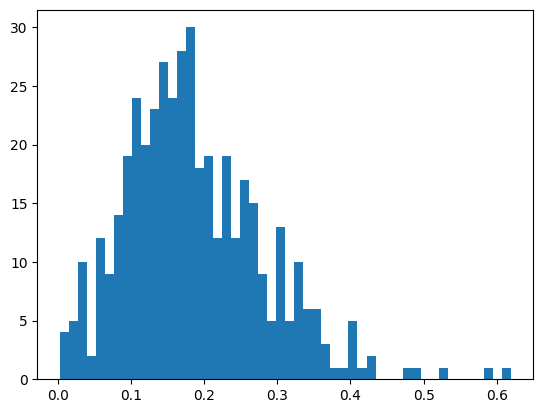

In [ ]:
lst_DAX_corr = []

for i in range(len(dax_DF_returns.corr(method='kendall'))):
    for j in range(i+1, len(dax_DF_returns.corr(method='kendall'))):
        lst_DAX_corr.append(dax_DF_returns.corr(method='kendall').values[i][j])
plt.hist(lst_DAX_corr, bins=50)
plt.show()

In [ ]:
FTSE_DF = FTSE_DF_returns.corr(method='kendall')

In [ ]:
FTSE_DF

,III.L,ADM.L,AAF.L,AAL.L,ANTO.L,AHT.L,ABF.L,AZN.L,AUTO.L,BME.L,...,SSE.L,STAN.L,STJ.L,TSCO.L,ULVR.L,UTG.L,VOD.L,WEIR.L,WTB.L,WPP.L
III.L,1.000000,0.271845,0.235209,0.154974,0.178369,0.323610,0.285116,0.132337,0.274575,0.288834,...,0.200397,0.202884,0.380974,0.222703,0.127273,0.226869,0.099842,0.306902,0.310227,0.283288
ADM.L,0.271845,1.000000,0.146440,0.099337,0.137866,0.146166,0.171518,0.157810,0.186311,0.164211,...,0.138086,0.162452,0.237857,0.185716,0.179967,0.172362,0.062920,0.180721,0.182857,0.150640
AAF.L,0.235209,0.146440,1.000000,0.200770,0.188075,0.215083,0.147377,0.145208,0.158513,0.167927,...,0.126189,0.223914,0.232636,0.171283,0.084790,0.154271,0.233480,0.192104,0.292643,0.167089
AAL.L,0.154974,0.099337,0.200770,1.000000,0.564742,0.274828,0.114488,0.038262,0.129354,0.085035,...,0.102588,0.253205,0.262981,0.132628,-0.048672,0.153600,0.166060,0.348574,0.155937,0.232042
ANTO.L,0.178369,0.137866,0.188075,0.564742,1.000000,0.332443,0.099838,0.095146,0.139881,0.107452,...,0.102078,0.270530,0.272077,0.071278,-0.028129,0.145836,0.090083,0.401681,0.175179,0.246418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UTG.L,0.226869,0.172362,0.154271,0.153600,0.145836,0.251266,0.180542,0.079056,0.279178,0.192506,...,0.301576,0.056057,0.340560,0.152534,0.064567,1.000000,0.168803,0.180600,0.217342,0.277691
VOD.L,0.099842,0.062920,0.233480,0.166060,0.090083,0.114414,0.201509,0.064311,0.120086,0.046238,...,0.144944,0.153129,0.243143,0.228923,0.082947,0.168803,1.000000,0.109574,0.208200,0.136257
WEIR.L,0.306902,0.180721,0.192104,0.348574,0.401681,0.378613,0.291457,0.098391,0.276696,0.229978,...,0.140772,0.294259,0.309802,0.143591,0.116818,0.180600,0.109574,1.000000,0.302147,0.356162
WTB.L,0.310227,0.182857,0.292643,0.155937,0.175179,0.290300,0.259896,0.119238,0.286915,0.223320,...,0.142347,0.211998,0.340061,0.200165,0.138085,0.217342,0.208200,0.302147,1.000000,0.296891


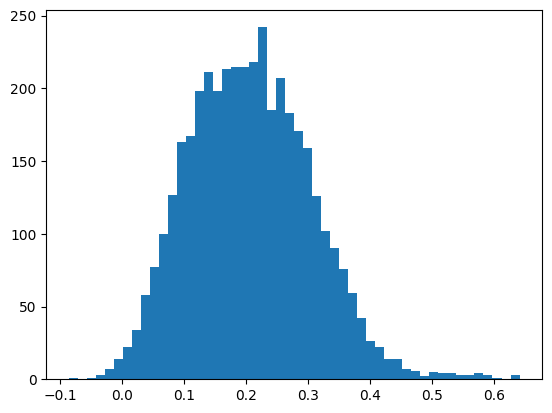

In [ ]:
lst_FTSE_corr = []

for i in range(len(FTSE_DF)):
    for j in range(i+1, len(FTSE_DF)):
        lst_FTSE_corr.append(FTSE_DF.values[i][j])
plt.hist(lst_FTSE_corr, bins=50)
plt.show()

In [ ]:
CAC_DF = CAC_DF_returns.corr(method='kendall')

In [ ]:
CAC_DF

,AI.PA,AIR.PA,ALO.PA,MT.AS,CS.PA,BNP.PA,EN.PA,CAP.PA,CA.PA,ACA.PA,...,GLE.PA,STLAP.PA,STMPA.PA,TEP.PA,HO.PA,TTE.PA,URW.PA,VIE.PA,DG.PA,WLN.PA
AI.PA,1.000000,0.302741,0.220124,0.275366,0.334720,0.286226,0.277916,0.208720,0.143846,0.243966,...,0.195834,0.234494,0.172076,0.191572,0.235898,0.190534,0.140624,0.294119,0.389422,0.149488
AIR.PA,0.302741,1.000000,0.172440,0.272609,0.270751,0.234776,0.197080,0.144761,0.101151,0.254933,...,0.242752,0.259790,0.187299,0.195744,0.294466,0.096837,0.163742,0.226762,0.260117,0.145407
ALO.PA,0.220124,0.172440,1.000000,0.274516,0.228207,0.264853,0.233590,0.194267,0.167405,0.243116,...,0.241377,0.191263,0.213486,0.180521,0.089927,0.116458,0.230001,0.188834,0.262266,0.330793
MT.AS,0.275366,0.272609,0.274516,1.000000,0.250175,0.384688,0.294778,0.245992,0.071585,0.347288,...,0.369725,0.378373,0.344373,0.248391,0.109107,0.238487,0.296773,0.214808,0.332807,0.271273
CS.PA,0.334720,0.270751,0.228207,0.250175,1.000000,0.435546,0.294137,0.201379,0.193582,0.415629,...,0.354638,0.285324,0.130002,0.147069,0.151198,0.260186,0.210517,0.247313,0.374434,0.191693
BNP.PA,0.286226,0.234776,0.264853,0.384688,0.435546,1.000000,0.350445,0.276528,0.153608,0.599296,...,0.593461,0.443142,0.310424,0.222944,0.080750,0.268533,0.283711,0.266590,0.405234,0.304475
EN.PA,0.277916,0.197080,0.233590,0.294778,0.294137,0.350445,1.000000,0.205550,0.223740,0.396102,...,0.346044,0.289973,0.199994,0.259077,0.084214,0.227801,0.263744,0.314623,0.441739,0.251116
CAP.PA,0.208720,0.144761,0.194267,0.245992,0.201379,0.276528,0.205550,1.000000,0.095761,0.240216,...,0.258638,0.280050,0.432341,0.235669,0.070622,0.085497,0.234873,0.298145,0.316937,0.241916
CA.PA,0.143846,0.101151,0.167405,0.071585,0.193582,0.153608,0.223740,0.095761,1.000000,0.159679,...,0.117615,0.122644,0.088886,0.087857,0.022769,0.138915,0.145958,0.198415,0.236626,0.141101
ACA.PA,0.243966,0.254933,0.243116,0.347288,0.415629,0.599296,0.396102,0.240216,0.159679,1.000000,...,0.577795,0.387044,0.291968,0.213108,0.065207,0.249590,0.297796,0.229676,0.367103,0.270961


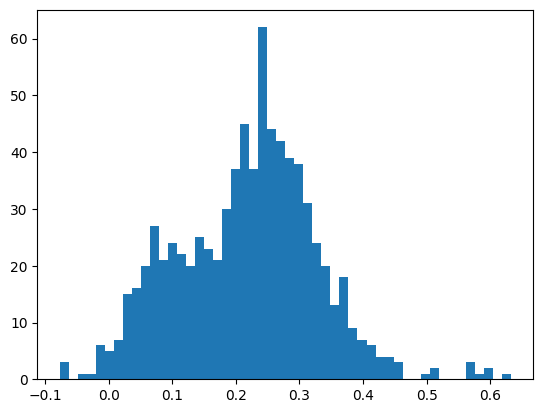

In [ ]:
lst_CAC_corr = []

for i in range(len(CAC_DF)):
    for j in range(i+1, len(CAC_DF)):
        lst_CAC_corr.append(CAC_DF.values[i][j])
plt.hist(lst_CAC_corr, bins=50)
plt.show()

In [ ]:
from scipy.stats import norm

In [ ]:
from src.test_statistics import kendall_statistics

In [ ]:
import numpy as np

def compute_bounds(correlation_matrix, alpha, gamma_0):
    upper_bounds = []
    lower_bounds = []
    ce = norm.ppf(0.05)
    cn = norm.ppf(1-(0.05))

      # Вычисление верхних и нижних границ для каждой пары (i, j)
    for i in range(N):
        for j in range(N):
            if i < j:


                  # Проверка гипотезы для верхней границы
                if correlation_matrix[i,j] >= ce:

                    upper_bounds.append(correlation_matrix[i, j])

                  # Проверка гипотезы для нижней границы
                if correlation_matrix[i,j] > cn:
                    lower_bounds.append(correlation_matrix[i, j])

    return upper_bounds, lower_bounds




In [ ]:
N = CAC_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(CAC_DF_returns.corr())


In [ ]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_fr = []
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = kendall_statistics(CAC_DF_returns, gamma_0)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_fr.append(len(upper_bounds)-len(lower_bounds))


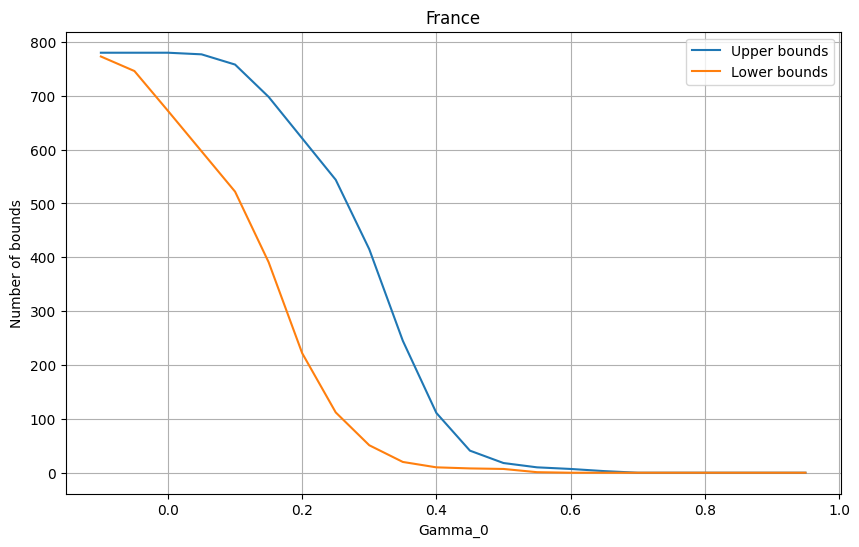

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('France')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
N = FTSE_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(FTSE_DF_returns.corr())

In [ ]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_eng = []
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = kendall_statistics(FTSE_DF_returns, gamma_0)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_eng.append(len(upper_bounds)-len(lower_bounds))


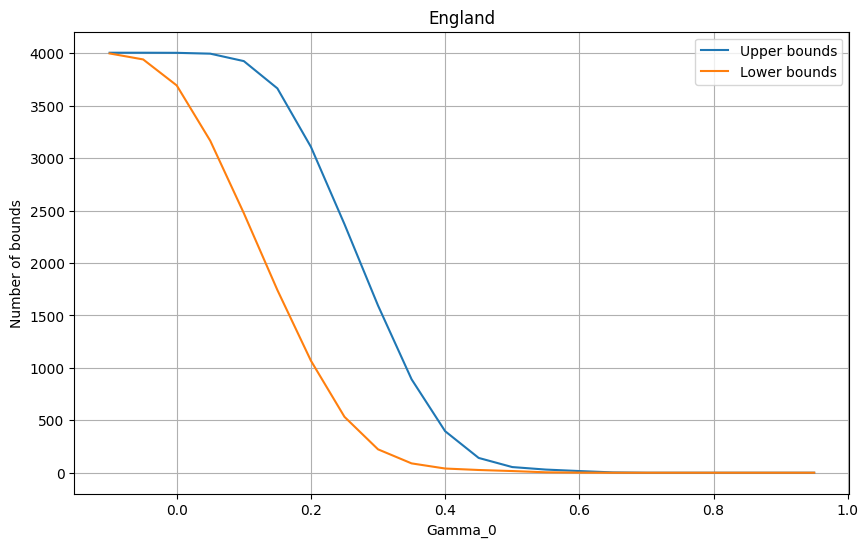

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('England')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
N = dax_DF_returns.corr().shape[0]
M=((N*(N-1))/2)
alpha = 0.1
gamma_0_values = np.arange(-0.1, 1.0, 0.05)
#gamma_0_values = [0.05, 0.1, 0.4, 0.5]
matrix = np.array(dax_DF_returns.corr())

In [ ]:
upper_bounds_counts = []
lower_bounds_counts = []
uncertainty_germ = []
for gamma_0 in gamma_0_values:
  correlation_matrix = []
  correlation_matrix = kendall_statistics(dax_DF_returns, gamma_0)
  upper_bounds, lower_bounds = compute_bounds(correlation_matrix,alpha, gamma_0)
  upper_bounds_counts.append(len(upper_bounds))
  lower_bounds_counts.append(len(lower_bounds))
  uncertainty_germ.append(len(upper_bounds)-len(lower_bounds))


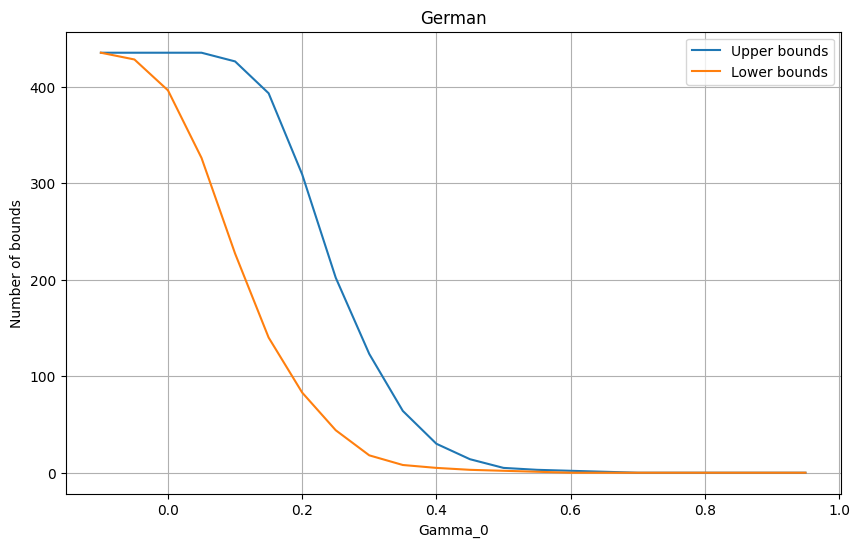

In [ ]:
# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, upper_bounds_counts, label='Upper bounds')
plt.plot(gamma_0_values, lower_bounds_counts, label='Lower bounds')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('German')
plt.legend()
plt.grid(True)
plt.show()

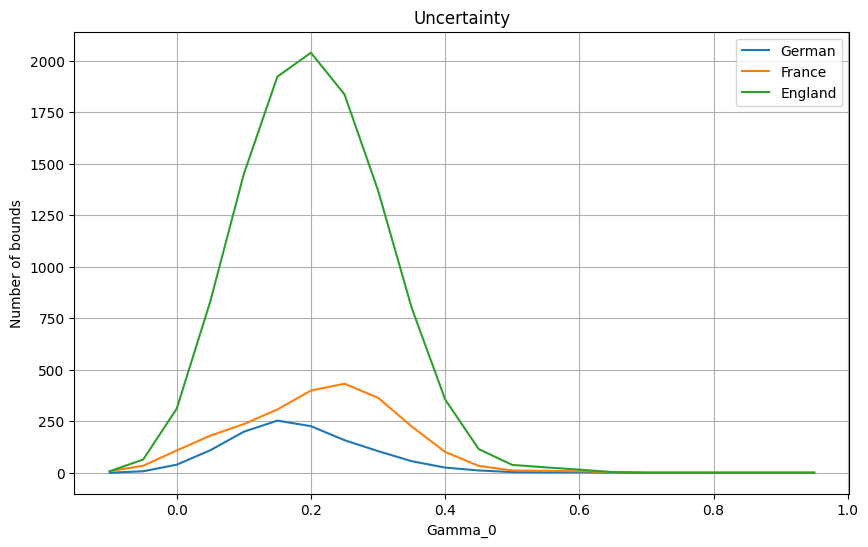

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gamma_0_values, uncertainty_germ, label='German')
plt.plot(gamma_0_values, uncertainty_fr, label='France')
plt.plot(gamma_0_values, uncertainty_eng, label='England')
plt.xlabel('Gamma_0')
plt.ylabel('Number of bounds')
plt.title('Uncertainty')
plt.legend()
plt.grid(True)
plt.show()